# 데이터 구조 미리보기

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
racks_4 = pd.read_csv(r"dataset\racks_4_2019_04.csv")

C:\Users\HogeunJo\anaconda3\envs\main\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (13,14) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
racks_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43151 entries, 0 to 43150
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Time            43151 non-null  object 
 1   Tmp             43151 non-null  float64
 2   TmpMax          43151 non-null  float64
 3   TmpMin          43151 non-null  float64
 4   TmpMinMaxLoc    43151 non-null  object 
 5   VCell           43151 non-null  float64
 6   VCellMax        43151 non-null  float64
 7   VCellMin        43151 non-null  float64
 8   VCellMinMaxLoc  43151 non-null  object 
 9   NModOn          43151 non-null  float64
 10  A               43151 non-null  float64
 11  AChaMax         43151 non-null  float64
 12  ADisChaMax      43151 non-null  float64
 13  EvtVnd1         5267 non-null   object 
 14  EvtVnd3         774 non-null    object 
 15  SoC             43151 non-null  float64
 16  SoH             43151 non-null  float64
 17  StEvtVnd        43151 non-null 

In [5]:
racks_4.head()

,Time,Tmp,TmpMax,TmpMin,TmpMinMaxLoc,VCell,VCellMax,VCellMin,VCellMinMaxLoc,NModOn,...,EvtVnd1,EvtVnd3,SoC,SoH,StEvtVnd,StVnd,V,W,WChaMax,WDisChaMax
0,2019-04-01 00:01:00,20.0,21.0,17.0,"{'max': 24, 'min': 2}",3.342,3.402,3.242,"{'max': 61, 'min': 96}",65535.0,...,NaN,NaN,2.0,98.0,"{'bpu fan feedback': 'OFF', 'cell balancing': ...",NORMAL,795.6,0.0,121800.0,12500.0
1,2019-04-01 00:02:00,20.0,21.0,17.0,"{'max': 24, 'min': 2}",3.342,3.401,3.245,"{'max': 59, 'min': 96}",65535.0,...,NaN,NaN,2.0,98.0,"{'bpu fan feedback': 'OFF', 'cell balancing': ...",NORMAL,795.6,0.0,121800.0,12500.0
2,2019-04-01 00:03:00,20.0,21.0,17.0,"{'max': 24, 'min': 2}",3.342,3.402,3.244,"{'max': 61, 'min': 96}",65535.0,...,NaN,NaN,2.0,98.0,"{'bpu fan feedback': 'OFF', 'cell balancing': ...",NORMAL,795.6,0.0,121800.0,12500.0
3,2019-04-01 00:04:00,20.0,21.0,17.0,"{'max': 24, 'min': 2}",3.342,3.402,3.245,"{'max': 61, 'min': 96}",65535.0,...,NaN,NaN,2.0,98.0,"{'bpu fan feedback': 'OFF', 'cell balancing': ...",NORMAL,795.6,0.0,121800.0,12500.0
4,2019-04-01 00:05:00,20.0,21.0,17.0,"{'max': 24, 'min': 2}",3.342,3.402,3.245,"{'max': 61, 'min': 96}",65535.0,...,NaN,NaN,2.0,98.0,"{'bpu fan feedback': 'OFF', 'cell balancing': ...",NORMAL,795.5,0.0,121800.0,12500.0


In [6]:
racks_4['Time'] = pd.to_datetime(racks_4['Time'])

In [7]:
racks_4 = racks_4[racks_4['Tmp'] != 0]

In [8]:
import matplotlib.ticker as ticker

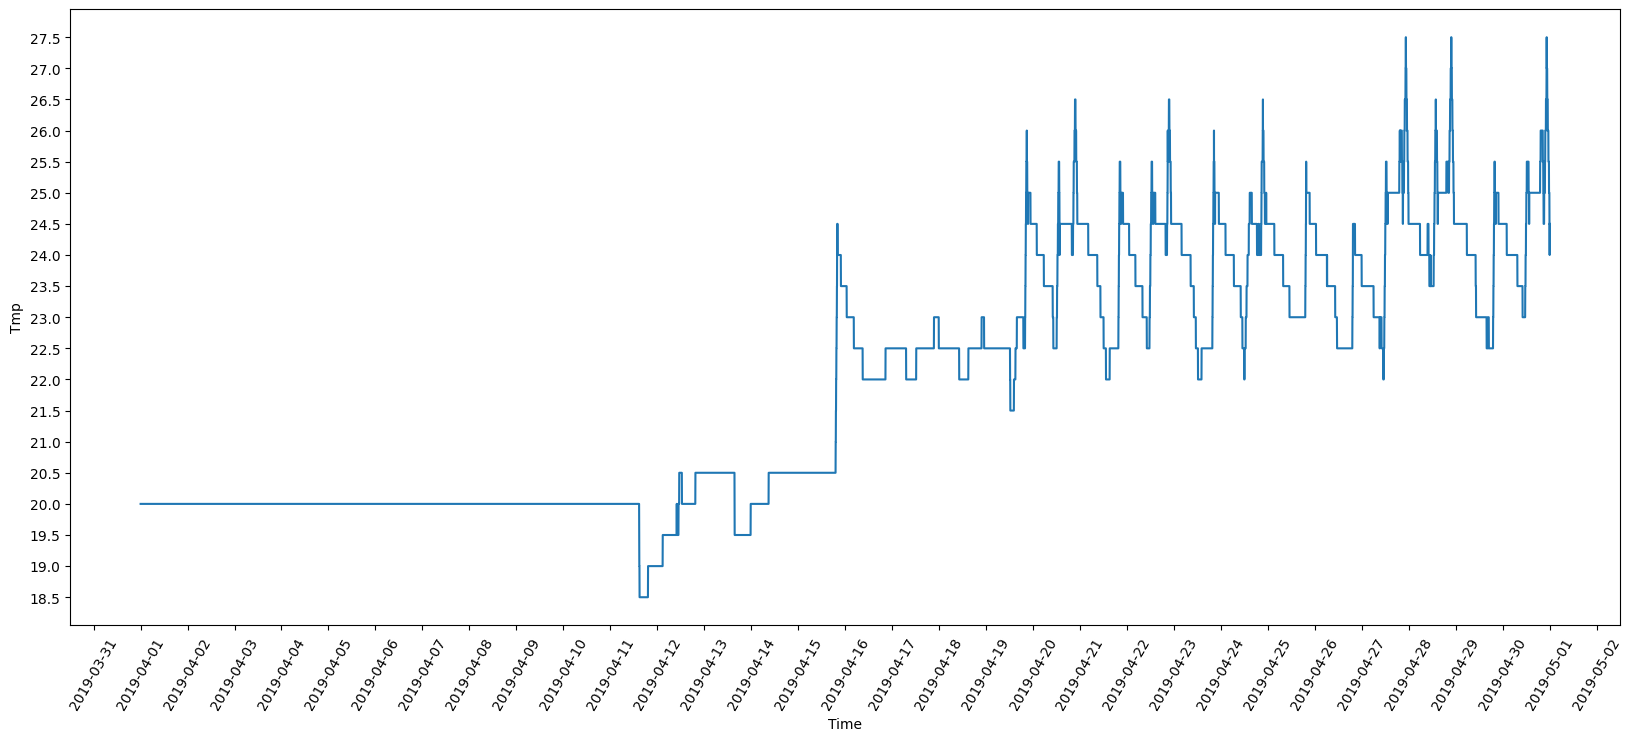

In [9]:
plt.figure(figsize=(20, 8))
ax = sns.lineplot(data=racks_4.loc[:, ['Time', 'Tmp']], x='Time', y='Tmp')
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.5))
plt.xticks(rotation=60)
plt.show()

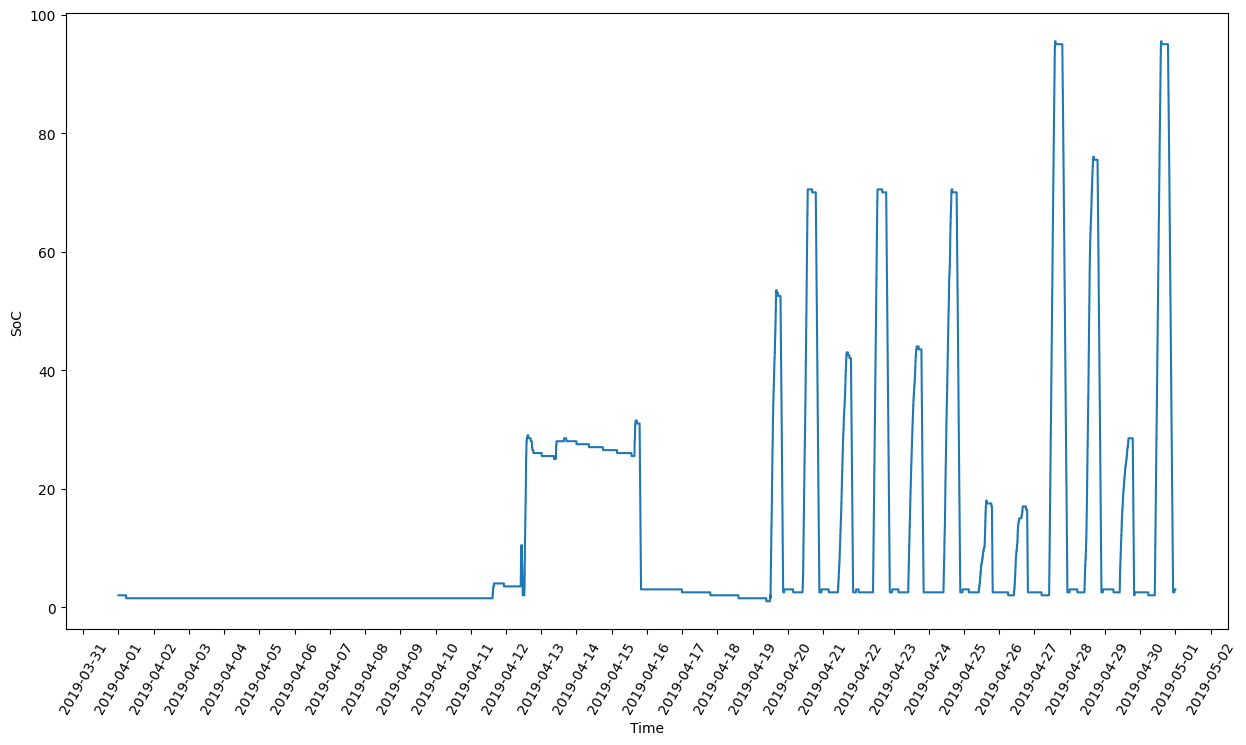

In [10]:
plt.figure(figsize=(15, 8))
ax = sns.lineplot(data=racks_4.loc[:, ['Time', 'SoC']], x='Time', y='SoC')
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
plt.xticks(rotation=60)
plt.show()

In [11]:
evt_1 = racks_4[racks_4.EvtVnd1.notnull()]
evt_3 = racks_4[racks_4.EvtVnd3.notnull()]

In [12]:
racks_4 = racks_4[racks_4.Time >= pd.Timestamp("2019-04-15")]

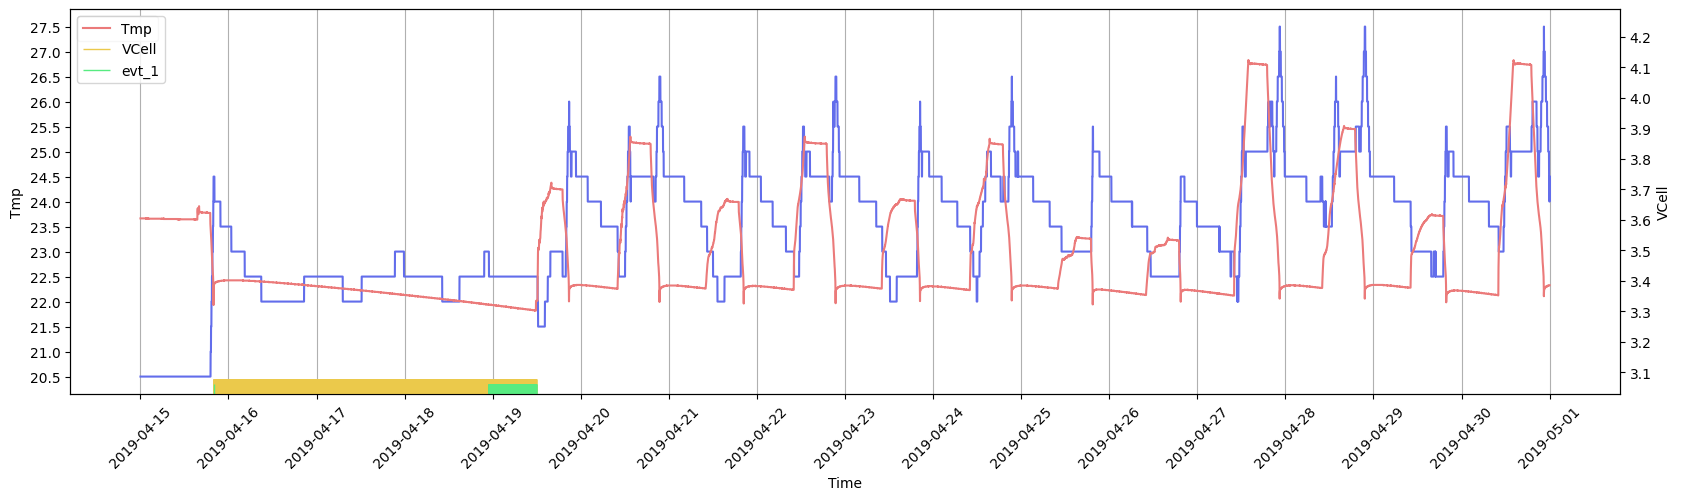

In [19]:
fig, ax = plt.subplots(figsize=(20, 5))

sns.lineplot(data=racks_4.loc[:, ['Time', 'Tmp']], x='Time', y='Tmp', ax=ax, color='#626DEB')

ax_2 = ax.twinx()
sns.lineplot(data=racks_4.loc[:, ['Time', 'VCell']], x='Time', y='VCell', ax=ax_2, color='#EB7A7A')

sns.rugplot(x=evt_1["Time"], height=0.04, color='#EBC94B')
sns.rugplot(x=evt_3["Time"], color='#57EB81')

ax.yaxis.set_major_locator(ticker.MultipleLocator(0.5))
ax_2.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.xaxis.grid(True)
ax.tick_params(axis='x', labelrotation=45)

fig.legend(labels=["Tmp", "VCell", "evt_1", "evt_3"])

plt.show()

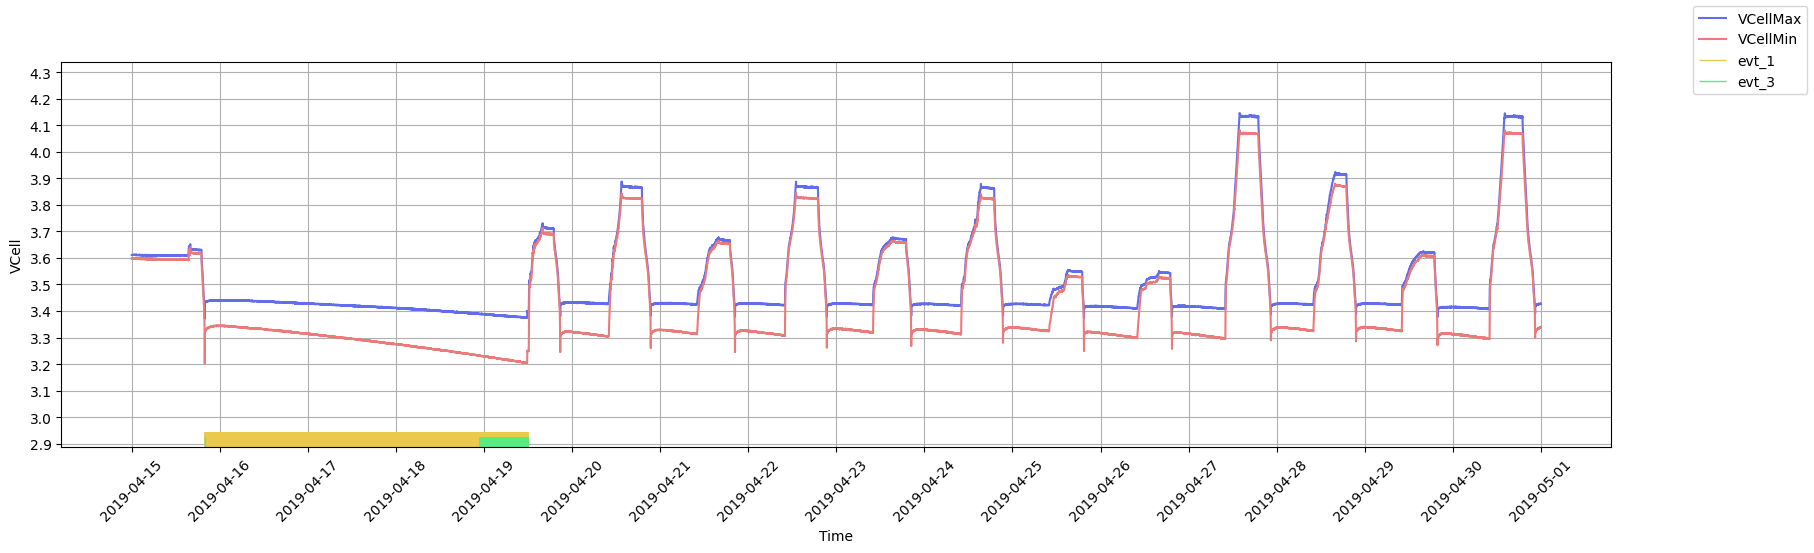

In [14]:
fig, ax = plt.subplots(figsize=(20, 5))

sns.lineplot(data=racks_4.loc[:, ['Time', 'VCellMax']], x='Time', y='VCellMax', ax=ax, color='#626DEB')
sns.lineplot(data=racks_4.loc[:, ['Time', 'VCellMin']], x='Time', y='VCellMin', ax=ax, color='#EB7A7A')

sns.rugplot(x=evt_1["Time"], height=0.04, color='#EBC94B')
sns.rugplot(x=evt_3["Time"], color='#57EB81')

ax.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.set_ylabel('VCell')
ax.grid(True)
ax.tick_params(axis='x', labelrotation=45)

fig.legend(labels=["VCellMax", "VCellMin", "evt_1", "evt_3"])

plt.show()

In [15]:
df = pd.DataFrame({'Time': racks_4['Time'], 'VCellMax-Min': racks_4['VCellMax'] - racks_4['VCellMin']})

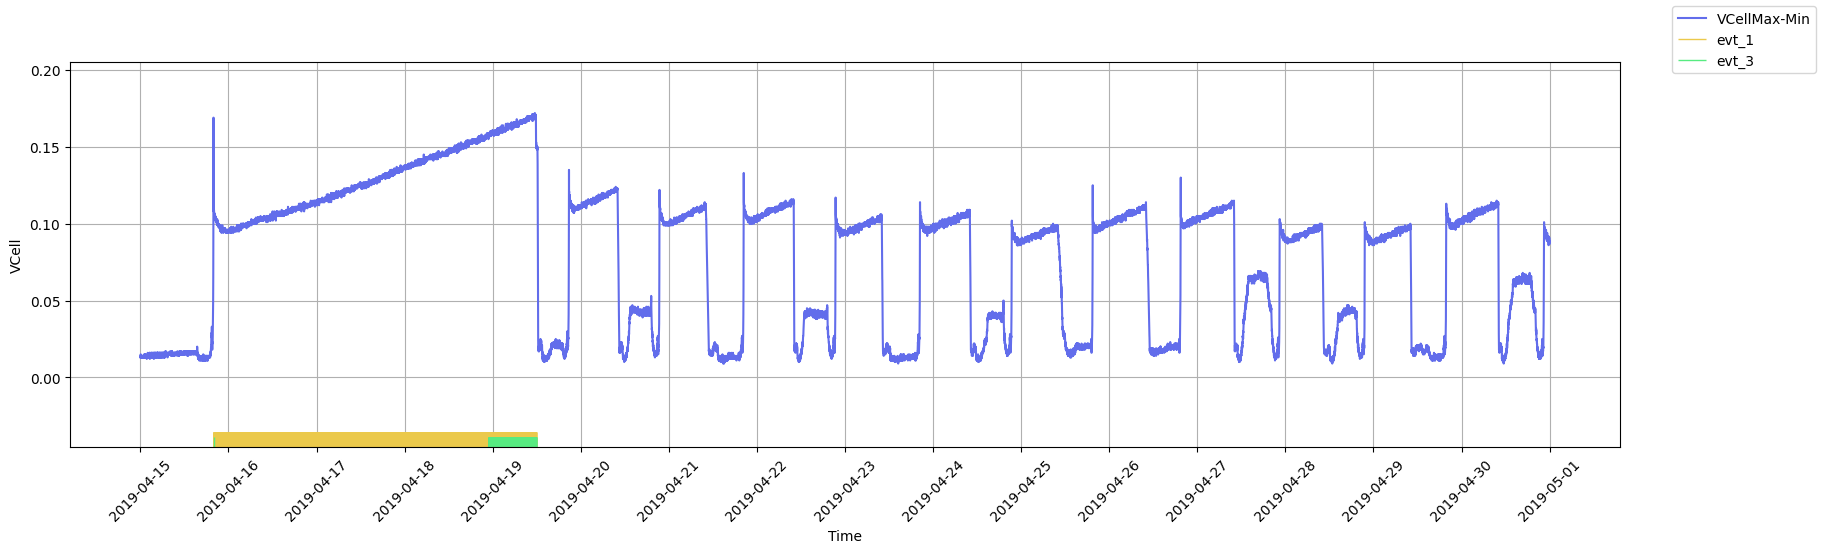

In [16]:
fig, ax = plt.subplots(figsize=(20, 5))

sns.lineplot(data=df, x='Time', y='VCellMax-Min', ax=ax, color='#626DEB')

sns.rugplot(x=evt_1["Time"], height=0.04, color='#EBC94B')
sns.rugplot(x=evt_3["Time"], color='#57EB81')

ax.yaxis.set_major_locator(ticker.MultipleLocator(0.05))
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.set_ylabel('VCell')
ax.grid(True)
ax.tick_params(axis='x', labelrotation=45)

fig.legend(labels=["VCellMax-Min", "evt_1", "evt_3"])

plt.show()

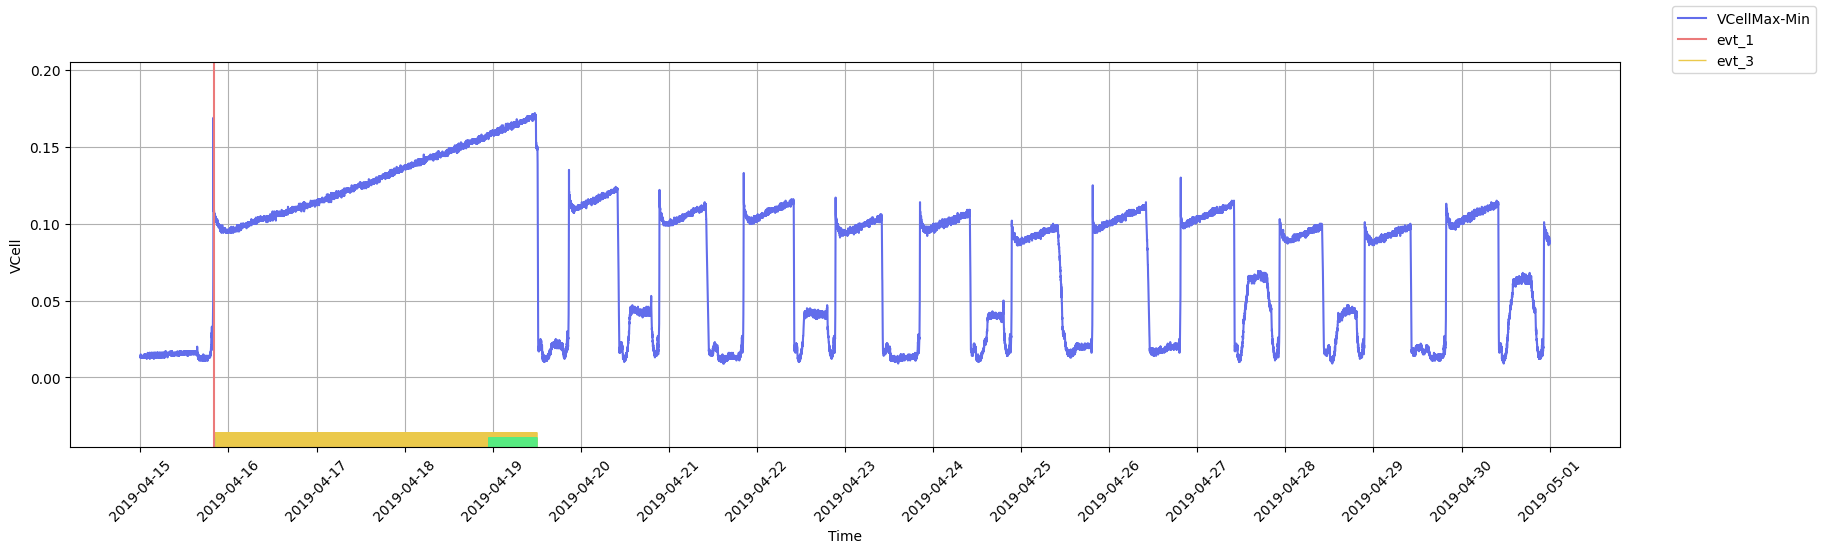

In [17]:
fig, ax = plt.subplots(figsize=(20, 5))

sns.lineplot(data=df, x='Time', y='VCellMax-Min', ax=ax, color='#626DEB')

sns.rugplot(x=evt_1["Time"], height=0.04, color='#EBC94B')
sns.rugplot(x=evt_3["Time"], color='#57EB81')

ax.axvline(x=evt_3["Time"].iloc[0], color='#EB7A7A')

ax.yaxis.set_major_locator(ticker.MultipleLocator(0.05))
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.set_ylabel('VCell')
ax.grid(True)
ax.tick_params(axis='x', labelrotation=45)

fig.legend(labels=["VCellMax-Min", "evt_1", "evt_3"])

plt.show()